In [45]:
!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet
!apt install openjdk-8-jdk-headless &> /dev/null

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Travel_Agent") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

In [4]:
df = spark.read.csv('/content/Travel Agent.csv', header=True, inferSchema=True)
df.show()

+--------------------+--------------------+--------+--------------------+--------------------+
|                Name|             Address|District|        AGA Division|            PS/MC/UC|
+--------------------+--------------------+--------+--------------------+--------------------+
|EXOTIC TOURS (PVT...|NO. 572/10, 2ND F...| Colombo|Dehiwala-Mount La...|Moratuwa Division...|
|HAMOOS TRAVELS (P...|NO.34, DR WIJEWAR...| Colombo|             Colombo|            Maradana|
|WORLDLINK TRAVELS...|NO.20 DHARMARAMA ...| Colombo|             Colombo|Colombo Divisiona...|
|THE TRAVEL MARKET...|NO. 182, AIRLINK ...| Colombo|             Colombo|Colombo Divisiona...|
|TANGERINE TOURS (...|NO.236, GALLE ROA...| Colombo|             Colombo|Colombo Divisiona...|
|SEIKOU LANKA TOUR...|NO.28, R.A.D. MEL...| Colombo|             Colombo|Colombo Divisiona...|
|HANA TRAVELS & TO...|NO.345.1/1, KOTTE...| Colombo|             Colombo|Colombo Divisiona...|
| FINTRAVEL (PVT) LTD|NO. 61, ALEXANDRA...| Colomb

In [5]:
df = spark.read.csv('/content/Travel Agent.csv', header=True, inferSchema=True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- District: string (nullable = true)
 |-- AGA Division: string (nullable = true)
 |-- PS/MC/UC: string (nullable = true)



In [6]:
from pyspark.sql.types import *
df.columns

['Name', 'Address', 'District', 'AGA Division', 'PS/MC/UC']

In [38]:
print("Travel Agency")
print("*"*15)
df.select("Name").show(truncate=False)



Travel Agency
***************
+-------------------------------------------+
|Name                                       |
+-------------------------------------------+
|EXOTIC TOURS (PVT) LTD                     |
|HAMOOS TRAVELS (PVT) LTD                   |
|WORLDLINK TRAVELS (PVT) LTD                |
|THE TRAVEL MARKET (PVT) LTD                |
|TANGERINE TOURS (PVT) LTD                  |
|SEIKOU LANKA TOURS (PVT) LTD               |
|HANA TRAVELS & TOURS (PVT) LTD             |
|FINTRAVEL (PVT) LTD                        |
|MAGICAL ISLE HOLIDAYS (PVT) LTD            |
|TAPROBANE TRAVELS ( PVT ) LTD              |
|CEYLON'S BEST TOURS (PVT) LTD              |
|LANKA TRAVEL SERVICES                      |
|GLOBAL CONNECTION TRAVELS & TOURS (PVT) LTD|
|REGIONAL DEVELOPMENT HOLDINGS (PVT) LTD    |
|ADITHYA LANKA HOLIDAYS (PVT) LTD           |
|GALLE TRAVLS & TOURS (PVT) LTD             |
|WILD HOLIDAYS TRAVELS (PVT) LTD            |
|UNITED LEISURE (PVT) LTD                   |
|VIC

In [37]:
print("Travel Agency")
print("*"*15)
df.select(df['Name'],df['District']).show(truncate=False)

Travel Agency
***************
+-------------------------------------------+--------+
|Name                                       |District|
+-------------------------------------------+--------+
|EXOTIC TOURS (PVT) LTD                     |Colombo |
|HAMOOS TRAVELS (PVT) LTD                   |Colombo |
|WORLDLINK TRAVELS (PVT) LTD                |Colombo |
|THE TRAVEL MARKET (PVT) LTD                |Colombo |
|TANGERINE TOURS (PVT) LTD                  |Colombo |
|SEIKOU LANKA TOURS (PVT) LTD               |Colombo |
|HANA TRAVELS & TOURS (PVT) LTD             |Colombo |
|FINTRAVEL (PVT) LTD                        |Colombo |
|MAGICAL ISLE HOLIDAYS (PVT) LTD            |Colombo |
|TAPROBANE TRAVELS ( PVT ) LTD              |Galle   |
|CEYLON'S BEST TOURS (PVT) LTD              |Galle   |
|LANKA TRAVEL SERVICES                      |Colombo |
|GLOBAL CONNECTION TRAVELS & TOURS (PVT) LTD|Colombo |
|REGIONAL DEVELOPMENT HOLDINGS (PVT) LTD    |Colombo |
|ADITHYA LANKA HOLIDAYS (PVT) LTD  

In [9]:
# Window functions are useful when you want to compute a value across a specific subset of rows.
#This is a window function that assigns a unique row number to each row within a window partition.
#We’ll use it to generate sequential numbers.
#lit means literal
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, lit

# Create a window specification with a dummy ORDER BY
#We use this as a "dummy" ordering criterion for our window, which essentially means "no specific order."
window_spec = Window.orderBy(lit(1))

# Add the "index" column with sequential numbers starting from 1
df = df.withColumn("index", row_number().over(window_spec))

# Reorder columns to place "index" at the start
df = df.select("index", *[col for col in df.columns if col != "index"])

# Show the result
df.show(truncate=False)


+-----+-------------------------------------------+----------------------------------------------------------------------+--------+------------------------+-------------------------------+
|index|Name                                       |Address                                                               |District|AGA Division            |PS/MC/UC                       |
+-----+-------------------------------------------+----------------------------------------------------------------------+--------+------------------------+-------------------------------+
|1    |EXOTIC TOURS (PVT) LTD                     |NO. 572/10, 2ND FLOOR, MADIWELA ROAD, THALAWATHUGODA                  |Colombo |Dehiwala-Mount Lavinia  |Moratuwa Divisional Secretariat|
|2    |HAMOOS TRAVELS (PVT) LTD                   |NO.34, DR WIJEWARDHANA MAWATHA, COLOMBO 10                            |Colombo |Colombo                 |Maradana                       |
|3    |WORLDLINK TRAVELS (PVT) LTD                |NO.2

In [10]:
dt = df.withColumnRenamed ('Name','Travel_Agent_Name')
dt.select('Travel_Agent_Name').show(truncate=False)

+-------------------------------------------+
|Travel_Agent_Name                          |
+-------------------------------------------+
|EXOTIC TOURS (PVT) LTD                     |
|HAMOOS TRAVELS (PVT) LTD                   |
|WORLDLINK TRAVELS (PVT) LTD                |
|THE TRAVEL MARKET (PVT) LTD                |
|TANGERINE TOURS (PVT) LTD                  |
|SEIKOU LANKA TOURS (PVT) LTD               |
|HANA TRAVELS & TOURS (PVT) LTD             |
|FINTRAVEL (PVT) LTD                        |
|MAGICAL ISLE HOLIDAYS (PVT) LTD            |
|TAPROBANE TRAVELS ( PVT ) LTD              |
|CEYLON'S BEST TOURS (PVT) LTD              |
|LANKA TRAVEL SERVICES                      |
|GLOBAL CONNECTION TRAVELS & TOURS (PVT) LTD|
|REGIONAL DEVELOPMENT HOLDINGS (PVT) LTD    |
|ADITHYA LANKA HOLIDAYS (PVT) LTD           |
|GALLE TRAVLS & TOURS (PVT) LTD             |
|WILD HOLIDAYS TRAVELS (PVT) LTD            |
|UNITED LEISURE (PVT) LTD                   |
|VICCTORY TRAVELS                 

In [40]:
from pyspark.sql.functions import concat, col, lit

# Concatenate "Travel Agent Name" and "District" with a separator (e.g., " - ")
df = df.withColumn("AgentName with District", concat(col("Name"), lit(" - "), col("District")))

# Show the result
df.select("AgentName with District").show(truncate=False)


# Display DataFrame title
print("Travel Agency")
print("*" * 15)

# Show the DataFrame
df.show(truncate=False)



+-----------------------------------------------------+
|AgentName with District                              |
+-----------------------------------------------------+
|EXOTIC TOURS (PVT) LTD - Colombo                     |
|HAMOOS TRAVELS (PVT) LTD - Colombo                   |
|WORLDLINK TRAVELS (PVT) LTD - Colombo                |
|THE TRAVEL MARKET (PVT) LTD - Colombo                |
|TANGERINE TOURS (PVT) LTD - Colombo                  |
|SEIKOU LANKA TOURS (PVT) LTD - Colombo               |
|HANA TRAVELS & TOURS (PVT) LTD - Colombo             |
|FINTRAVEL (PVT) LTD - Colombo                        |
|MAGICAL ISLE HOLIDAYS (PVT) LTD - Colombo            |
|TAPROBANE TRAVELS ( PVT ) LTD - Galle                |
|CEYLON'S BEST TOURS (PVT) LTD - Galle                |
|LANKA TRAVEL SERVICES - Colombo                      |
|GLOBAL CONNECTION TRAVELS & TOURS (PVT) LTD - Colombo|
|REGIONAL DEVELOPMENT HOLDINGS (PVT) LTD - Colombo    |
|ADITHYA LANKA HOLIDAYS (PVT) LTD - Gampaha     

In [20]:
df = df.drop('AgentName with District')
df.show(truncate=False)

+-----+-------------------------------------------+----------------------------------------------------------------------+--------+------------------------+-------------------------------+
|index|Name                                       |Address                                                               |District|AGA Division            |PS/MC/UC                       |
+-----+-------------------------------------------+----------------------------------------------------------------------+--------+------------------------+-------------------------------+
|1    |EXOTIC TOURS (PVT) LTD                     |NO. 572/10, 2ND FLOOR, MADIWELA ROAD, THALAWATHUGODA                  |Colombo |Dehiwala-Mount Lavinia  |Moratuwa Divisional Secretariat|
|2    |HAMOOS TRAVELS (PVT) LTD                   |NO.34, DR WIJEWARDHANA MAWATHA, COLOMBO 10                            |Colombo |Colombo                 |Maradana                       |
|3    |WORLDLINK TRAVELS (PVT) LTD                |NO.2

In [21]:
# Group by "District" and count the number of rows in each group
df_grouped = df.groupBy("District").count()

# Show the result
df_grouped.show(truncate=False)


+------------+-----+
|District    |count|
+------------+-----+
|Trincomalee |3    |
|Matara      |3    |
|Ratnapura   |2    |
|Kegalle     |6    |
|Colombo     |627  |
|Jaffna      |2    |
|Gampaha     |96   |
|Nuwara Eliya|1    |
|Kalutara    |13   |
|Puttalam    |11   |
|Kandy       |14   |
|Hambantota  |1    |
|Ampara      |14   |
|Kurunegala  |14   |
|Batticaloa  |8    |
|Galle       |13   |
+------------+-----+



In [43]:
from pyspark.sql.functions import max as F_max, min as F_min

# Step 1: Group by "District" and count the number of rows in each group
df_grouped = df.groupBy("District").count()

# Step 2: Calculate the maximum and minimum count values
max_count = df_grouped.agg(F_max("count").alias("max_count")).collect()[0]["max_count"]
min_count = df_grouped.agg(F_min("count").alias("min_count")).collect()[0]["min_count"]

# Step 3: Filter the districts that have the max and min counts
max_count_districts = df_grouped.filter(df_grouped["count"] == max_count)
min_count_districts = df_grouped.filter(df_grouped["count"] == min_count)

# Step 4: Display the districts with the maximum count
print("District(s) with Maximum Count:")
max_count_districts.show(truncate=False)

# Step 5: Display the districts with the minimum count
print("District(s) with Minimum Count:")
min_count_districts.show(truncate=False)


District(s) with Maximum Count:
+--------+-----+
|District|count|
+--------+-----+
|Colombo |627  |
+--------+-----+

District(s) with Minimum Count:
+------------+-----+
|District    |count|
+------------+-----+
|Nuwara Eliya|1    |
|Hambantota  |1    |
+------------+-----+



In [24]:
# Group by "District," "AGA Division," and "PS/MC/UC" and get the count for each group
df_grouped = df.groupBy(
    trim(col("District")).alias("District"),
    trim(col("AGA Division")).alias("AGA Division"),
    trim(col("PS/MC/UC")).alias("PS/MC/UC")
).count()

# Show the grouped and counted data
df_grouped.show(truncate=False)


+------------+----------------------------+-----------------------------------+-----+
|District    |AGA Division                |PS/MC/UC                           |count|
+------------+----------------------------+-----------------------------------+-----+
|Colombo     |Maharagama                  |Kesbewa Divisional Secretariat     |1    |
|Gampaha     |Kelaniya Pradeshiya Sabha   |Gampaha Divisional Secretariat     |1    |
|Colombo     |Colombo                     |Mount Lavinia                      |1    |
|Colombo     |Sri Jayawardenapura-Kotte   |Sri jayawadanapura                 |10   |
|Jaffna      |Chavakachcheri              |Jaffna Divisional Secretariat      |1    |
|Jaffna      |Jaffna                      |Jaffna Divisional Secretariat      |1    |
|Matara      |Dickwella                   |Dickwella Divisional Secretariat   |1    |
|Colombo     |Colombo                     |Colombo Divisional Secretariat     |438  |
|Nuwara Eliya|Nuwara Eliya                |Ambagamuwa 

In [22]:
#get the total count
total_count = df.count()
print("TOTAL TRAVEL AGENCIES : " + str(total_count))

#Filtered record in Colombo District
Colombo_filtered_count = df.filter(col('District')=='Colombo').count()
print("COLOMBO FILTERED RECORD COUNT: " + str(Colombo_filtered_count))
df.filter(col('District')=='Colombo').show(truncate=False)

TOTAL TRAVEL AGENCIES : 828
COLOMBO FILTERED RECORD COUNT: 627
+-----+-------------------------------------------+----------------------------------------------------------------------+--------+----------------------+-------------------------------+
|index|Name                                       |Address                                                               |District|AGA Division          |PS/MC/UC                       |
+-----+-------------------------------------------+----------------------------------------------------------------------+--------+----------------------+-------------------------------+
|1    |EXOTIC TOURS (PVT) LTD                     |NO. 572/10, 2ND FLOOR, MADIWELA ROAD, THALAWATHUGODA                  |Colombo |Dehiwala-Mount Lavinia|Moratuwa Divisional Secretariat|
|2    |HAMOOS TRAVELS (PVT) LTD                   |NO.34, DR WIJEWARDHANA MAWATHA, COLOMBO 10                            |Colombo |Colombo               |Maradana                       |
|3

In [23]:
from pyspark.sql.functions import trim

# Use trim to  remove any leading and trailing whitespace from a specified column in a DataFrame.
df_filtered = df.filter((trim(col('District')) == 'Galle') & (trim(col('AGA Division')) == 'Bentota Pradeshiya Sabha'))

# Show the filtered result
df_filtered.show(truncate=False)

+-----+---------------------------------+-------------------------------------+--------+------------------------+-------------------------------+
|index|Name                             |Address                              |District|AGA Division            |PS/MC/UC                       |
+-----+---------------------------------+-------------------------------------+--------+------------------------+-------------------------------+
|11   |CEYLON'S BEST TOURS (PVT) LTD    |MIHIRIPENNA, WARAPITIYA, DHARGA TOWN |Galle   |Bentota Pradeshiya Sabha|Benthota Divisional Secretariat|
|39   |RICHARD TRAVELS AND TOURS(PVT)LTD|NO 17 A GALLE ROAD, ANGAGODA BENTHOTA|Galle   |Bentota Pradeshiya Sabha|Benthota Divisional Secretariat|
|655  |VISIT SRI LANKA TOURS            |NO:14,GALLE ROAD,ALUTHGAMA           |Galle   |Bentota Pradeshiya Sabha|Benthota Divisional Secretariat|
+-----+---------------------------------+-------------------------------------+--------+------------------------+-----------

In [25]:
df.orderBy('Name', ascending=False).show(truncate=False)

+-----+-------------------------------------+--------------------------------------------------------------------------+--------+-------------------------+-----------------------------------+
|index|Name                                 |Address                                                                   |District|AGA Division             |PS/MC/UC                           |
+-----+-------------------------------------+--------------------------------------------------------------------------+--------+-------------------------+-----------------------------------+
|656  |ZENITH EXPEDITIONS (PVT) LTD.        |103B,POORVARMA MAWATHA,COLOMBO 5, SRI LNKA                                |Colombo |Colombo                  |Colombo Divisional Secretariat     |
|677  |ZEN TOURS (PVT) LTD                  |LEVEL 13/F, EAST TOWER, WORLD TRADE CENTER, COLOMBO 01                    |Colombo |Colombo                  |Colombo Divisional Secretariat     |
|818  |ZELDIVA LANKA PRIVATE LIMITED    

In [26]:
df.orderBy('index', ascending=False).show(truncate=False)

+-----+-----------------------------------------+--------------------------------------------------------------+----------+---------------------------+--------------------------------------+
|index|Name                                     |Address                                                       |District  |AGA Division               |PS/MC/UC                              |
+-----+-----------------------------------------+--------------------------------------------------------------+----------+---------------------------+--------------------------------------+
|828  |TRIPFUSION DMC                           |NO. 98, 5TH FLOOR,,HAVELOCK ROAD,COLOMBO 5                    |Colombo   |Colombo                    |Thimbirigasyaya Divisional Secretariat|
|827  |TREK LANKA                               |NO. 129,AIRPORT ROAD,ANDIAMBALAMA                             |Gampaha   |Katana Pradeshiya Sabha    |Katana Divisional Secretariat         |
|826  |WILD ISLAND SAFARIS (PVT) LTD         

In [27]:
#sum  is imported and aliased as F_sum to avoid any conflicts with Python’s built-in sum function
#round imported to round numerical values.
from pyspark.sql.functions import  sum as F_sum, round

# Step 1: Group by "District" and get the count for each district
df_district_count = df.groupBy(trim(col("District")).alias("District")).count()

# Step 2: Calculate the total number of travel agencies
total_count = df_district_count.agg(F_sum("count").alias("total_count")).collect()[0]["total_count"]

# Step 3: Calculate the percentage of each district's travel agencies and add the "%" symbol
df_percentage = df_district_count.withColumn("Percentage",
                                             concat(round((col("count") / total_count) * 100, 2).cast("string"), lit("%")))

# Show the result
df_percentage.show(truncate=False)

+------------+-----+----------+
|District    |count|Percentage|
+------------+-----+----------+
|Trincomalee |3    |0.36%     |
|Matara      |3    |0.36%     |
|Ratnapura   |2    |0.24%     |
|Kegalle     |6    |0.72%     |
|Colombo     |627  |75.72%    |
|Jaffna      |2    |0.24%     |
|Gampaha     |96   |11.59%    |
|Nuwara Eliya|1    |0.12%     |
|Kalutara    |13   |1.57%     |
|Puttalam    |11   |1.33%     |
|Kandy       |14   |1.69%     |
|Hambantota  |1    |0.12%     |
|Ampara      |14   |1.69%     |
|Kurunegala  |14   |1.69%     |
|Batticaloa  |8    |0.97%     |
|Galle       |13   |1.57%     |
+------------+-----+----------+



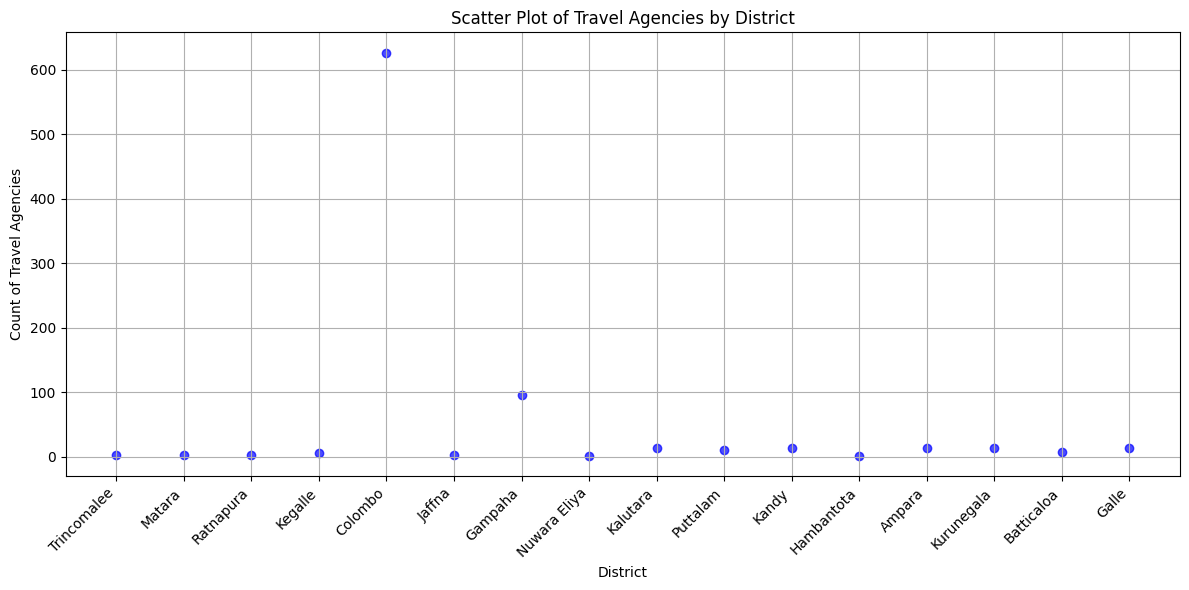

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Group by "District" and get the count for each district
df_district_count = df.groupBy(trim(col("District")).alias("District")).count()

# Step 2: Convert the PySpark DataFrame to a Pandas DataFrame
df_pd = df_district_count.toPandas()

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_pd['District'], df_pd['count'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot of Travel Agencies by District')
plt.xlabel('District')
plt.ylabel('Count of Travel Agencies')

# Rotates the x-axis labels by 45 degrees to prevent them from overlapping and make them easier to read
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)#Displays a grid in the background of the plot, which helps with readability.
plt.tight_layout()#Automatically adjusts the layout to ensure everything fits within the plot area and nothing is cut off.
plt.show()

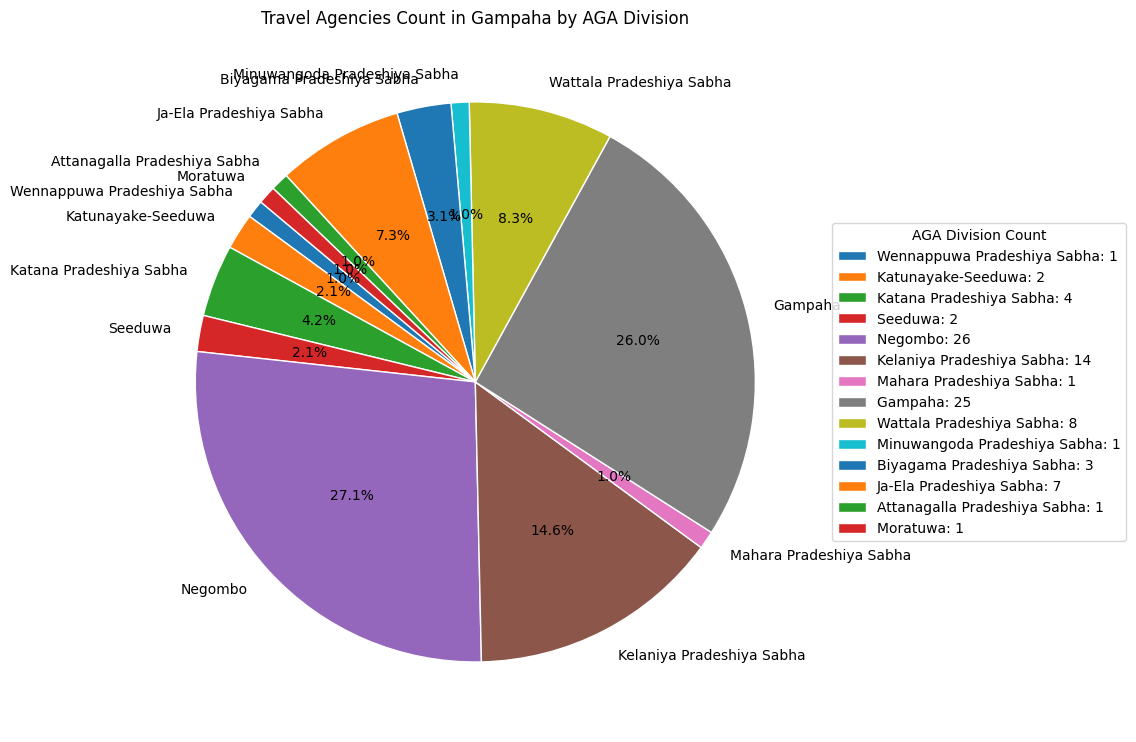

In [33]:
#"Travel Agencies Count in Gampaha by AGA Division"
# Step 1: Filter the DataFrame for Gampaha District
gampaha_df = df.filter(trim(col("District")) == "Gampaha")

# Step 2: Group by "AGA Division" and count the number of travel agencies
#trim(col("AGA Division") removes any extra spaces from "AGA Division" values.
#.alias("AGA Division") renames the trimmed column to "AGA Division" for clarity in the resulting DataFrame.
gampaha_aga_count = gampaha_df.groupBy(trim(col("AGA Division")).alias("AGA Division")).count()

# Step 3: Convert the PySpark DataFrame to a Pandas DataFrame
gampaha_aga_pd = gampaha_aga_count.toPandas()

# Step 4: Plotting the pie chart with percentage labels
plt.figure(figsize=(10, 8))
plt.pie(# creates a pie chart based on the "count" column of gampaha_aga_pd
    gampaha_aga_pd["count"],# The size of each pie slice is determined by the number of agencies in each "AGA Division.
    labels=gampaha_aga_pd["AGA Division"],#Labels each slice with its respective "AGA Division
    startangle=140,#Rotates the pie chart by 140 degrees for a different layout.
    autopct='%1.1f%%',  # Display percentage
    wedgeprops=dict(edgecolor='w')  # Optional: adds a border to slices
)

# Add legend with AGA Division names and counts outside the pie chart
plt.legend(
    #creates a list of strings where each entry shows an "AGA Division" name and its count
    [f"{label}: {count}" for label, count in zip(gampaha_aga_pd["AGA Division"], gampaha_aga_pd["count"])],
    title="AGA Division Count",
    loc="center left",
    bbox_to_anchor=(1, 0.5)#positions the legend outside the pie chart
)


# Title for the chart
plt.title("Travel Agencies Count in Gampaha by AGA Division")
plt.tight_layout()
plt.show()
